### View the data


In [1]:
import pandas as pd

news = pd.read_csv('C:/Users/Admin/Desktop/DataSmart/Modul3/AI+ML/Project/Fakenews/news.csv')

# Überprüfen auf fehlende Daten
missing_data = news.isnull().sum()

# Anzeigen der ersten Zeilen des Datensatzes, fehlenden Daten und Shape
news.head(), print(missing_data), news.shape

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


(   Unnamed: 0                                              title  \
 0        8476                       You Can Smell Hillary’s Fear   
 1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
 2        3608        Kerry to go to Paris in gesture of sympathy   
 3       10142  Bernie supporters on Twitter erupt in anger ag...   
 4         875   The Battle of New York: Why This Primary Matters   
 
                                                 text label  
 0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
 1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
 2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
 3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
 4  It's primary day in New York and front-runners...  REAL  ,
 None,
 (6335, 4))

### Explore the data

Anzahl 'FAKE': 3164
Anzahl 'REAL': 3171


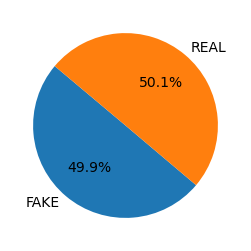

In [2]:
import matplotlib.pyplot as plt

# Verhältnis von FAKE zu REAL zählen
fake_count = news[news['label'] == 'FAKE'].shape[0]
real_count = news[news['label'] == 'REAL'].shape[0]
print("Anzahl 'FAKE':", fake_count)
print("Anzahl 'REAL':", real_count)

# Tortendiagramm erstellen
plt.figure(figsize=(4, 3))
plt.pie([fake_count, real_count], labels=['FAKE', 'REAL'], autopct='%1.1f%%', startangle=140)
plt.show()

#### Define Data - TF-IDF (Term Frequency-Inverse Document Frequency)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Merkmale extrahieren
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
    # Wandelt Text in Zahlen um,
    # Wichtigkeit eines Wortes relativ zu seiner Häufigkeit im Dokument
    # hierbei werden nur die 1000 häufigsten Wörter als Merkmale definiert
X = tfidf_vectorizer.fit_transform(news['text']) # setzt die neuen Text-Zahlen als X
y = news['label'] # setzt die FAKE/REAL klassifikation als Y
feature_names = tfidf_vectorizer.get_feature_names_out() 

#### Train/Test Split 

In [4]:
from sklearn.model_selection import train_test_split

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes (NB)

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Naive Bayes-Modell trainieren
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Modell evaluieren
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label='REAL')
recall_nb = recall_score(y_test, y_pred_nb, pos_label='REAL')
f1_nb = f1_score(y_test, y_pred_nb, pos_label='REAL')
report_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Ausgabe
print("Genauigkeit des Naive Bayes-Modells:", accuracy_nb)
print(conf_matrix_nb)
print(report_nb)

Genauigkeit des Random Forest-Modells: 0.8839779005524862
[[573  55]
 [ 92 547]]
              precision    recall  f1-score   support

        FAKE       0.86      0.91      0.89       628
        REAL       0.91      0.86      0.88       639

    accuracy                           0.88      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.89      0.88      0.88      1267



### Random Forest (RF)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest-Modell trainieren
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Modell evaluieren
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='REAL')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='REAL')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='REAL')
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Ausgabe
print("Genauigkeit des Random Forest-Modells:", accuracy_rf)
print(conf_matrix_rf)
print(report_rf)

Genauigkeit des Random Forest-Modells: 0.9108129439621152
[[574  54]
 [ 59 580]]
              precision    recall  f1-score   support

        FAKE       0.91      0.91      0.91       628
        REAL       0.91      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



### Support Vector Machine (SVM)

In [7]:
from sklearn.svm import SVC

# SVM-Modell trainieren
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Modell evaluieren
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='REAL')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='REAL')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='REAL')
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Ausgabe
print("Genauigkeit des SVM-Modells:", accuracy_svm)
print(conf_matrix_svm)
print(report_svm)

Genauigkeit des SVM-Modells: 0.9289660615627466
[[587  41]
 [ 49 590]]
              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93       628
        REAL       0.94      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



### Logistische Regression (LR)

In [8]:
from sklearn.linear_model import LogisticRegression

# Logistisches Regressionsmodell trainieren
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Modell evaluieren
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='REAL')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='REAL')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='REAL')
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Ausgabe
print("Genauigkeit des Logistische-Regression-Modells:", accuracy_lr)
print(conf_matrix_lr)
print(report_lr)

Genauigkeit des Logistische-Regression-Modells: 0.914759273875296
[[575  53]
 [ 55 584]]
              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.91       628
        REAL       0.92      0.91      0.92       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



### Gradient Boosting Machine (GBM)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# GBM-Modell trainieren
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train, y_train)

# Modell evaluieren
y_pred_gbm = gbm_classifier.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, pos_label='REAL')
recall_gbm = recall_score(y_test, y_pred_gbm, pos_label='REAL')
f1_gbm = f1_score(y_test, y_pred_gbm, pos_label='REAL')
report_gbm = classification_report(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Ausgabe
print("Genauigkeit des GBM-Modells:", accuracy_gbm)
print(conf_matrix_gbm)
print(report_gbm)

Genauigkeit des GBM-Modells: 0.9005524861878453
[[567  61]
 [ 65 574]]
              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       628
        REAL       0.90      0.90      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



### K-Nearest Neighbor (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# KNN-Modell trainieren
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Modell evaluieren
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label='REAL')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='REAL')
f1_knn = f1_score(y_test, y_pred_knn, pos_label='REAL')
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Ausgabe
print("Genauigkeit des KNN-Modells:", accuracy_knn)
print(conf_matrix_knn)
print(report_knn)

Genauigkeit des KNN-Modells: 0.8310970797158642
[[515 113]
 [101 538]]
              precision    recall  f1-score   support

        FAKE       0.84      0.82      0.83       628
        REAL       0.83      0.84      0.83       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



### Vergleich der Modelle anhand Report-Werte  
<sub>diese wurden im Vorfeld bei den einzelnen Modellen bereits generiert und gespeichert

                   Modell  Accuracy  Precision    Recall  F1-Score
0             Naive Bayes  0.883978   0.908638  0.856025  0.881547
1           Random Forest  0.910813   0.914826  0.907668  0.911233
2                     SVM  0.928966   0.935024  0.923318  0.929134
3  Logistische Regression  0.914759   0.916797  0.913928  0.915361
4                     GBM  0.900552   0.903937  0.898279  0.901099
5                     KNN  0.831097   0.826421  0.841941  0.834109


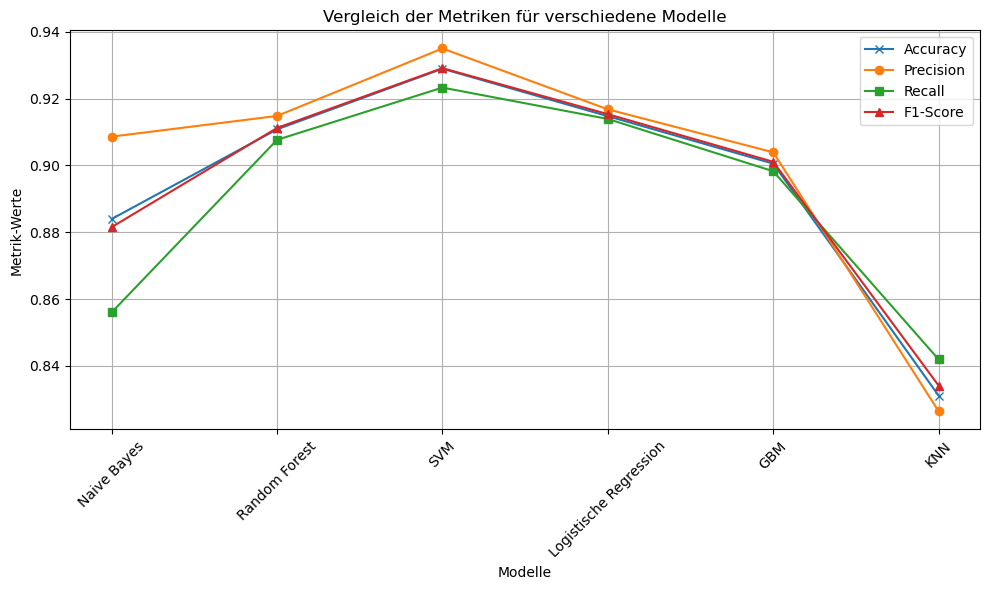

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Modelle und ihre Metriken
models = ["Naive Bayes", "Random Forest", "SVM", "Logistische Regression", "GBM", "KNN"]
accuracy = [accuracy_nb, accuracy_rf, accuracy_svm, accuracy_lr, accuracy_gbm, accuracy_knn]
precision = [precision_nb, precision_rf, precision_svm, precision_lr, precision_gbm, precision_knn]
recall = [recall_nb, recall_rf, recall_svm, recall_lr, recall_gbm, recall_knn]
f1 = [f1_nb, f1_rf, f1_svm, f1_lr, f1_gbm, f1_knn]

# Erstellung einer Tabelle
data = {
    "Modell": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}
df = pd.DataFrame(data)

# Anzeigen der Tabelle
print(df)
# Erstellung des Plots
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='x', label='Accuracy') # als Kreuz
plt.plot(models, precision, marker='o', label='Precision') # als Kreis
plt.plot(models, recall, marker='s', label='Recall') # als Quadrat (square)
plt.plot(models, f1, marker='^', label='F1-Score') # als Dreieck

# Achsenbeschriftungen und Titel
plt.xlabel('Modelle')
plt.ylabel('Metrik-Werte')
plt.title('Vergleich der Metriken für verschiedene Modelle')
plt.xticks(rotation=45)  # Rotiere die x-Achsenbeschriftungen für eine bessere Lesbarkeit
plt.grid(True)
plt.legend()

# Anzeigen des Plots
plt.tight_layout()
plt.show()

# EXTRAS

### Vergleich der Modelle mittels ROC-Kurven  
<sub> (Receiver Operating Characteristic -> Gibt die Trennschärfe von falsepositiv/truepositiv der Modelle an  
Perfekt wäre 1.00 wenn die Kurve komplett in der Ecke oben links ist)

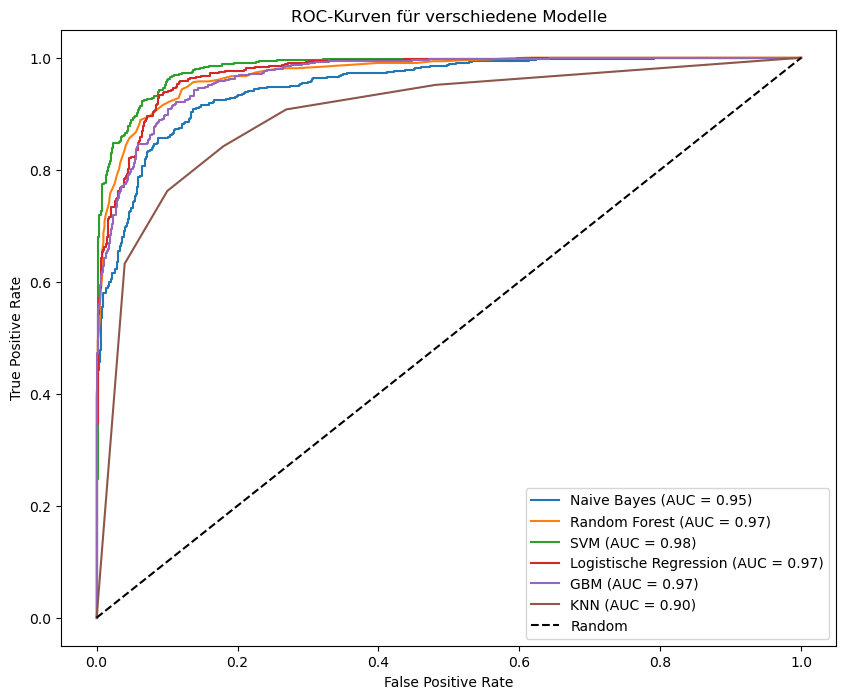

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Berechnen der ROC-Kurven und AUC für jedes Modell
models = [naive_bayes, random_forest, svm_classifier, logistic_regression, gbm_classifier, knn_classifier]
model_names = ["Naive Bayes", "Random Forest", "SVM", "Logistische Regression", "GBM", "KNN"]
    # legt Modelle und Namen fest
plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Prüft ob das jeweilige Modell eine Entscheidungsfunktion besitzt
    # Dementsprechend werden Vorhersagemodelle passend gewählt

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label="REAL")
    # Festlegung dass "REAL" als positiv gewertet wird
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    # Achsenfestlegung

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Kurven für verschiedene Modelle')
plt.legend(loc="lower right")
plt.show()
